In [1]:
### Tree Regression Model Forecasting ###
# Import dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Get Data Frames from Yahoo! Finance
# yfinance is used to fetch data 
yf.pdr_override()
# input
symbol = 'FB'
start = '2017-01-01'
end = '2020-07-31'
# Read data 
df = yf.download(symbol,start,end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,116.029999,117.839996,115.510002,116.860001,116.860001,20663900
2017-01-04,117.550003,119.660004,117.290001,118.690002,118.690002,19630900
2017-01-05,118.860001,120.949997,118.320000,120.669998,120.669998,19492200
2017-01-06,120.980003,123.879997,120.029999,123.410004,123.410004,28545300
2017-01-09,123.550003,125.430000,123.040001,124.900002,124.900002,22880400


In [3]:
# Get number of trading days
df.shape

(900, 6)

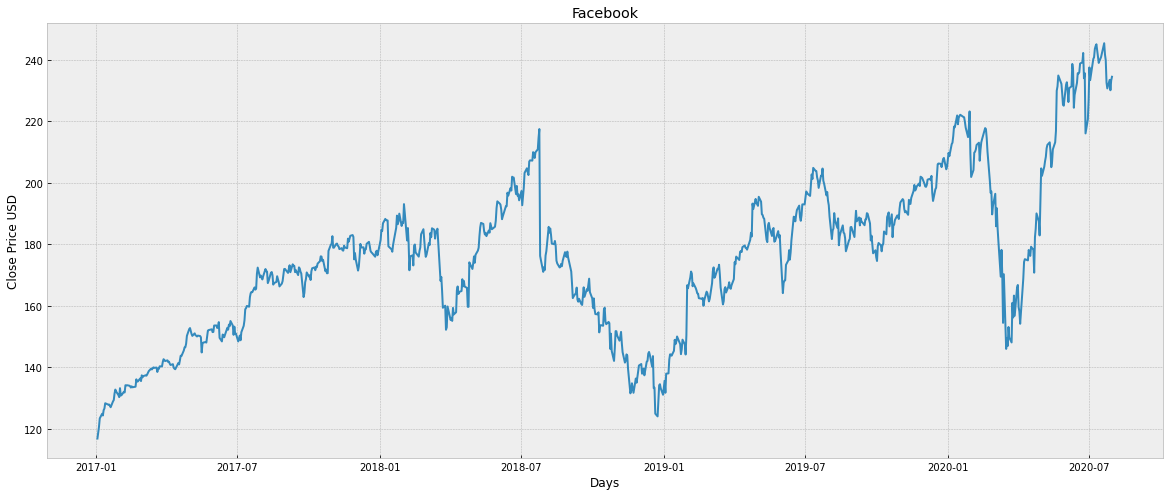

In [3]:
# Visualize Close Price data
plt.figure(figsize=(20,8))
plt.title('Facebook')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Adj Close'])
plt.show()


In [4]:
# Get close prices
df = df[['Adj Close']]
df.head()

,Adj Close
Date,
2017-01-03,116.860001
2017-01-04,118.690002
2017-01-05,120.669998
2017-01-06,123.410004
2017-01-09,124.900002


In [5]:
# Create a variable to predict 'x' days out into the future
future_days = 25
# Create a new column (target) shifted 'x' units/days up
df['Prediction'] = df[['Adj Close']].shift(-future_days)
df.tail(4)

,Adj Close,Prediction
Date,,
2020-07-27,233.500000,NaN
2020-07-28,230.119995,NaN
2020-07-29,233.289993,NaN
2020-07-30,234.500000,NaN


In [6]:
# Create the feature data set (X) and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[116.86000061]
 [118.69000244]
 [120.66999817]
 [123.41000366]
 [124.90000153]
 [124.34999847]
 [126.08999634]
 [126.62000275]
 [128.33999634]
 [127.87000275]
 [127.91999817]
 [127.55000305]
 [127.04000092]
 [128.92999268]
 [129.36999512]
 [131.47999573]
 [132.77999878]
 [132.17999268]
 [130.97999573]
 [130.32000732]
 [133.22999573]
 [130.83999634]
 [130.97999573]
 [132.05999756]
 [131.83999634]
 [134.19999695]
 [134.13999939]
 [134.19000244]
 [134.05000305]
 [133.8500061 ]
 [133.44000244]
 [133.83999634]
 [133.52999878]
 [133.72000122]
 [136.11999512]
 [135.36000061]
 [135.44000244]
 [136.41000366]
 [135.53999329]
 [137.41999817]
 [136.75999451]
 [137.16999817]
 [137.41999817]
 [137.30000305]
 [137.72000122]
 [138.24000549]
 [138.78999329]
 [139.6000061 ]
 [139.32000732]
 [139.72000122]
 [139.99000549]
 [139.83999634]
 [139.94000244]
 [138.50999451]
 [139.58999634]
 [139.52999878]
 [140.33999634]
 [140.32000732]
 [141.75999451]
 [142.6499939 ]
 [142.41000366]
 [142.05000305]
 [142.27

In [7]:
# Create the target fata set (y) and convert it to a numpy array and get all of the target values except the last 'x' rows/days
y = np.array(df['Prediction'])[:-future_days]
print(y)

[134.19999695 134.13999939 134.19000244 134.05000305 133.8500061
 133.44000244 133.83999634 133.52999878 133.72000122 136.11999512
 135.36000061 135.44000244 136.41000366 135.53999329 137.41999817
 136.75999451 137.16999817 137.41999817 137.30000305 137.72000122
 138.24000549 138.78999329 139.6000061  139.32000732 139.72000122
 139.99000549 139.83999634 139.94000244 138.50999451 139.58999634
 139.52999878 140.33999634 140.32000732 141.75999451 142.6499939
 142.41000366 142.05000305 142.27999878 141.72999573 141.8500061
 141.16999817 140.77999878 141.03999329 139.91999817 139.58000183
 139.38999939 141.41999817 140.96000671 142.27000427 143.80000305
 143.67999268 145.47000122 146.49000549 146.55999756 147.69999695
 150.25       152.46000671 152.77999878 151.80000305 150.8500061
 150.24000549 151.05999756 150.47999573 150.28999329 150.03999329
 150.33000183 150.19000244 149.77999878 144.8500061  147.66000366
 148.05999756 148.24000549 148.07000732 150.03999329 151.96000671
 152.13000488 

In [8]:
# Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [9]:
#### Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

In [10]:
# Get the last 'x' rows of the feature data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[229.97000122],
       [231.38999939],
       [234.91000366],
       [232.19999695],
       [229.13999939],
       [225.46000671],
       [225.08999634],
       [231.91000366],
       [232.72000122],
       [230.16000366],
       [226.28999329],
       [230.77000427],
       [231.3999939 ],
       [238.66999817],
       [236.72999573],
       [224.42999268],
       [228.58000183],
       [232.5       ],
       [235.6499939 ],
       [235.52999878],
       [235.94000244],
       [238.78999329],
       [239.22000122],
       [242.24000549],
       [234.02000427]])

In [11]:
# Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[235.67999268 239.         220.63999939 227.07000732 237.55000305
 233.41999817 240.27999878 227.07000732 241.75       244.5
 245.07000732 239.         239.         240.27999878 240.92999268
 240.27999878 237.55000305 241.75       239.86999512 239.86999512
 230.71000671 233.5        230.11999512 230.11999512 234.5       ]


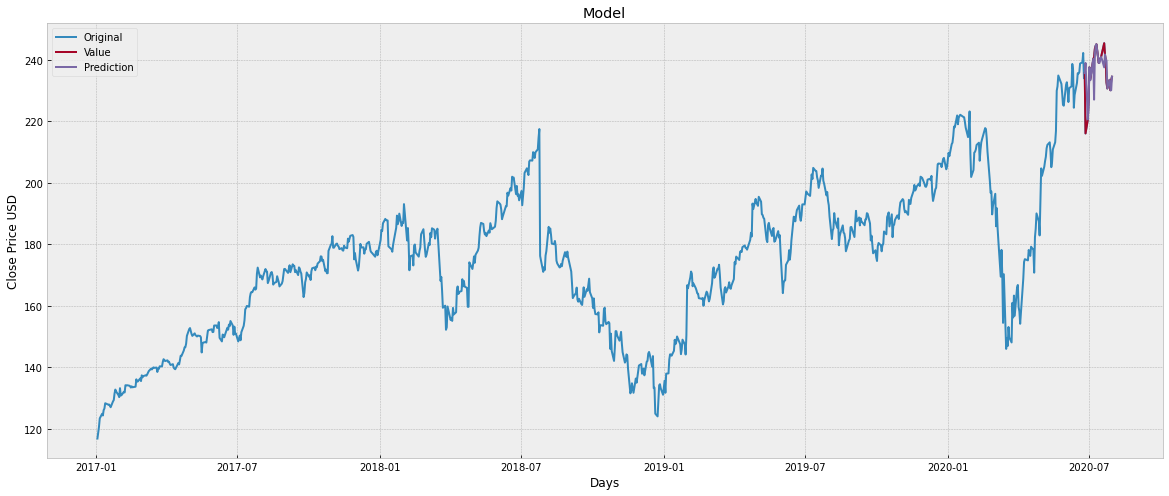

In [12]:
# Visualize the data from tree predictor model 
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Prediction'] = predictions 
plt.figure(figsize=(20,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Adj Close'])
plt.plot(valid[['Adj Close', 'Prediction']])
plt.legend(['Original', 'Value', 'Prediction'])
plt.show()

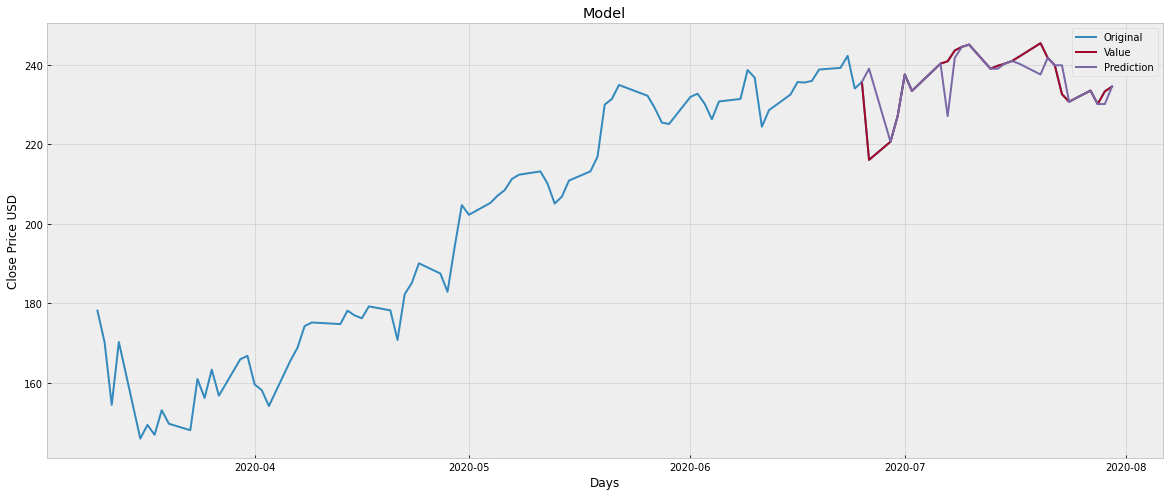

In [13]:
# Visualize the data from tree predictor model (Zoom)
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Prediction'] = predictions 
plt.figure(figsize=(20,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Adj Close'][800:])
plt.plot(valid[['Adj Close', 'Prediction']])
plt.legend(['Original', 'Value', 'Prediction'])
plt.show()